In [1]:
import requests

url = "https://business.yelp.com/external-assets/files/Yelp-JSON.zip"
filename = "Yelp-JSON.zip"

# Adding a User-Agent header to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, stream=True, headers=headers)
response.raise_for_status() # Raise an exception for HTTP errors

with open(filename, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print(f"Downloaded {filename} successfully.")

Downloaded Yelp-JSON.zip successfully.


In [2]:
!unzip Yelp-JSON.zip
print("Extracted Yelp-JSON.zip successfully.")

Archive:  Yelp-JSON.zip
   creating: Yelp JSON/
  inflating: Yelp JSON/Yelp Dataset Documentation & ToS copy.pdf  
  inflating: __MACOSX/Yelp JSON/._Yelp Dataset Documentation & ToS copy.pdf  
  inflating: Yelp JSON/yelp_dataset.tar  
  inflating: __MACOSX/Yelp JSON/._yelp_dataset.tar  
Extracted Yelp-JSON.zip successfully.


In [3]:
!tar -xf "Yelp JSON/yelp_dataset.tar" -C .

In [4]:
!du -sh *

80K	Dataset_User_Agreement.pdf
16K	__MACOSX
55M	sample_data
114M	yelp_academic_dataset_business.json
274M	yelp_academic_dataset_checkin.json
5.0G	yelp_academic_dataset_review.json
173M	yelp_academic_dataset_tip.json
3.2G	yelp_academic_dataset_user.json
4.1G	Yelp JSON
4.1G	Yelp-JSON.zip


In [5]:
import pandas as pd
import os
import random
import io

# Redefine the paths to the JSON files (assuming they are in the current directory)
business_file = 'yelp_academic_dataset_business.json'
review_file = 'yelp_academic_dataset_review.json'
user_file = 'yelp_academic_dataset_user.json'

# Define sampling rates
sample_rate_business = 0.50 # 50% for business file
sample_rate_large = 0.10    # 10% for review and user files

# --- Re-Sample and Load DataFrames ---
print(f"Re-sampling and loading {business_file} with rate {sample_rate_business*100}%...")
sampled_business_lines = []
with open(business_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_business:
            sampled_business_lines.append(line)
df_business_sampled = pd.read_json(io.StringIO(''.join(sampled_business_lines)), lines=True)
print("df_business_sampled shape:", df_business_sampled.shape)

print(f"Re-sampling and loading {review_file} with rate {sample_rate_large*100}%...")
sampled_review_lines = []
with open(review_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_review_lines.append(line)
df_review_sampled = pd.read_json(io.StringIO(''.join(sampled_review_lines)), lines=True)
print("df_review_sampled shape:", df_review_sampled.shape)

print(f"Re-sampling and loading {user_file} with rate {sample_rate_large*100}%...")
sampled_user_lines = []
with open(user_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_user_lines.append(line)
df_user_sampled = pd.read_json(io.StringIO(''.join(sampled_user_lines)), lines=True)
print("df_user_sampled shape:", df_user_sampled.shape)

print("Sampled Yelp dataset files re-loaded into DataFrames successfully.")

# --- 1. Distribution of business ratings (stars) from df_business_sampled ---
print("\n--- 1. Distribution of business ratings (stars) from df_business_sampled ---")
dist_business_stars_sampled = df_business_sampled['stars'].value_counts().sort_index()
print("Distribution of Sampled Business Ratings:")
print(dist_business_stars_sampled)

# --- 2. Top 10 business categories by count from df_business_sampled ---
print("\n--- 2. Top 10 business categories by count from df_business_sampled ---")
# Filter out rows where 'categories' is None or NaN
df_business_sampled_clean_categories = df_business_sampled.dropna(subset=['categories'])

# Split categories string into a list of categories and then explode them into separate rows
all_categories_sampled = df_business_sampled_clean_categories['categories'].str.split(', ').explode()

# Count the occurrences of each category
category_counts_sampled = all_categories_sampled.value_counts()

# Get the top 10 most frequent categories
top_10_categories_sampled = category_counts_sampled.head(10)

print("Top 10 Sampled Business Categories:")
print(top_10_categories_sampled)

# --- 3. Distribution of review stars from df_review_sampled ---
print("\n--- 3. Distribution of review stars from df_review_sampled ---")
dist_review_stars_sampled = df_review_sampled['stars'].value_counts().sort_index()
print("Distribution of Sampled Review Stars:")
print(dist_review_stars_sampled)

# --- 4. Top 10 users by review count from df_user_sampled ---
print("\n--- 4. Top 10 users by review count from df_user_sampled ---")
top_10_users_by_review_count_sampled = df_user_sampled.sort_values(by='review_count', ascending=False).head(10)
print("Top 10 Sampled Users by Review Count:")
print(top_10_users_by_review_count_sampled[['name', 'review_count', 'average_stars']])

Re-sampling and loading yelp_academic_dataset_business.json with rate 50.0%...
df_business_sampled shape: (75378, 14)
Re-sampling and loading yelp_academic_dataset_review.json with rate 10.0%...
df_review_sampled shape: (699520, 9)
Re-sampling and loading yelp_academic_dataset_user.json with rate 10.0%...
df_user_sampled shape: (198577, 22)
Sampled Yelp dataset files re-loaded into DataFrames successfully.

--- 1. Distribution of business ratings (stars) from df_business_sampled ---
Distribution of Sampled Business Ratings:
stars
1.0     1025
1.5     2500
2.0     4673
2.5     7238
3.0     9309
3.5    13286
4.0    15456
4.5    13781
5.0     8110
Name: count, dtype: int64

--- 2. Top 10 business categories by count from df_business_sampled ---
Top 10 Sampled Business Categories:
categories
Restaurants         26292
Food                14044
Shopping            12149
Beauty & Spas        7222
Home Services        7142
Nightlife            6239
Health & Medical     5926
Bars               


--- 1. Distribution of business ratings (stars) from df_business ---
Distribution of Business Ratings:
stars
1.0     1025
1.5     2500
2.0     4673
2.5     7238
3.0     9309
3.5    13286
4.0    15456
4.5    13781
5.0     8110
Name: count, dtype: int64

--- 2. Top 10 business categories by count from df_business ---
Top 10 Business Categories:
categories
Restaurants         26292
Food                14044
Shopping            12149
Beauty & Spas        7222
Home Services        7142
Nightlife            6239
Health & Medical     5926
Bars                 5621
Local Services       5576
Automotive           5397
Name: count, dtype: int64

--- 3. Distribution of review stars from df_review ---
Distribution of Review Stars:
stars
1    107256
2     54513
3     69257
4    145326
5    323168
Name: count, dtype: int64

--- 4. Top 10 users by review count from df_user ---
Top 10 Users by Review Count:
          name  review_count  average_stars
79526   Victor         16978           3.35
505    

/tmp/ipython-input-148325016.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_business['stars'], palette='viridis')


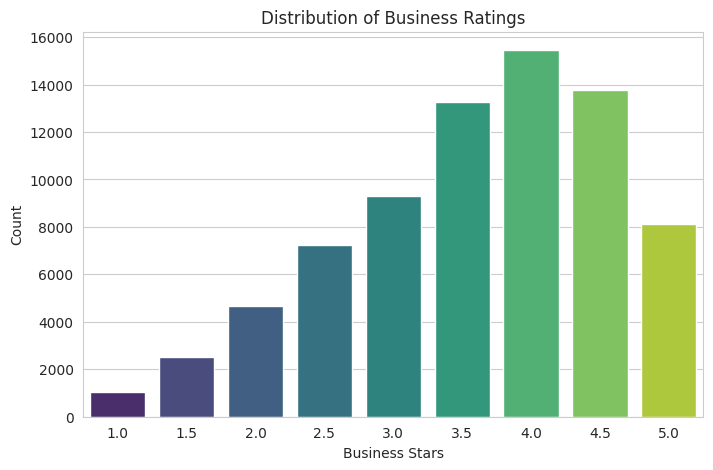

/tmp/ipython-input-148325016.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='mako')


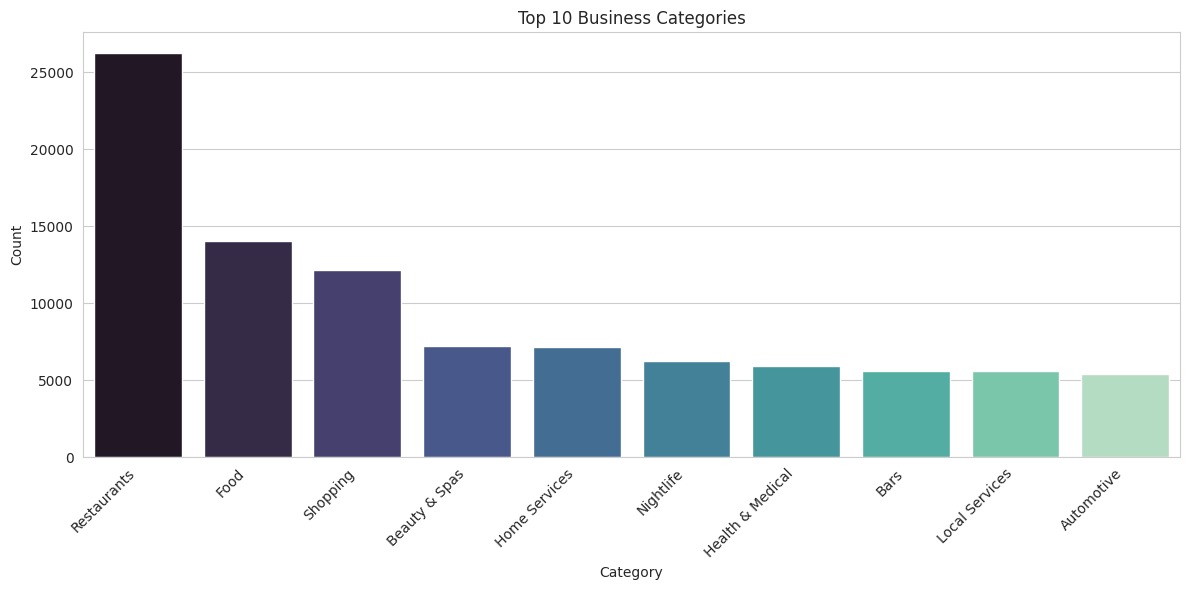

/tmp/ipython-input-148325016.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_review['stars'], palette='magma')


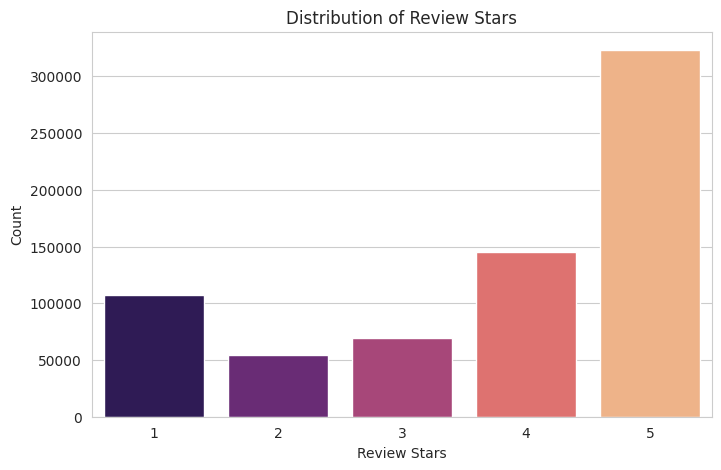

/tmp/ipython-input-148325016.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_users_by_review_count['name'], y=top_10_users_by_review_count['review_count'], palette='rocket')


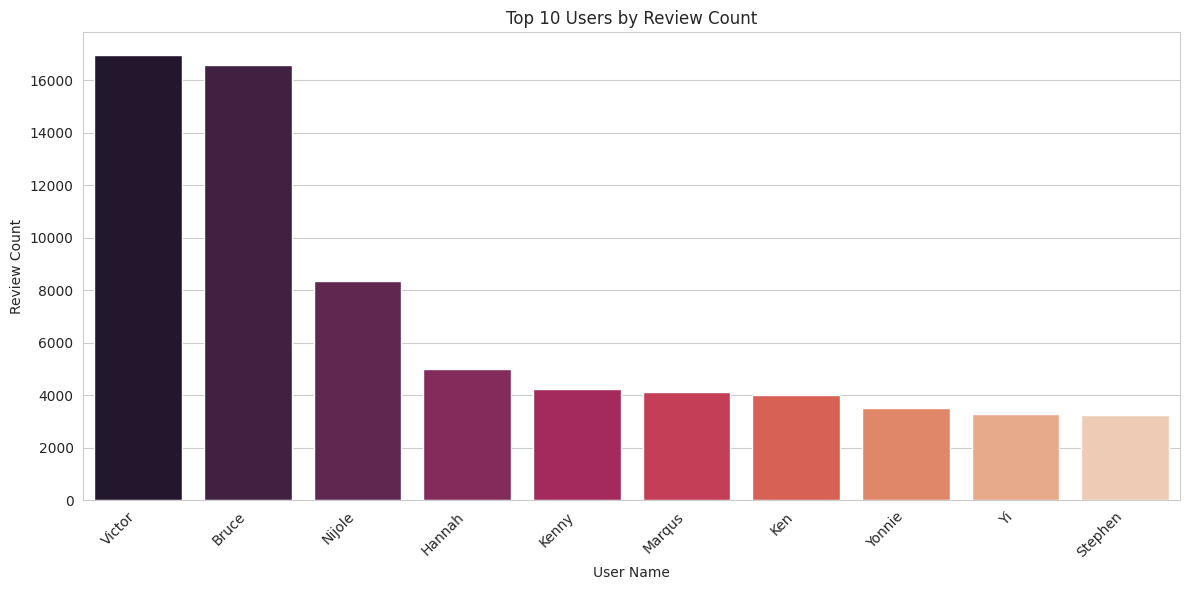

Visualizations generated successfully.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# # Redefine the paths to the JSON files (assuming they are in the current directory)
# business_file = 'yelp_academic_dataset_business.json'
# review_file = 'yelp_academic_dataset_review.json'
# user_file = 'yelp_academic_dataset_user.json'

# # Re-load the business data
# print(f"\nLoading {business_file}...")
# df_business = pd.read_json(business_file, lines=True)
# print("df_business shape:", df_business.shape)

# # Re-load the review data
# print(f"\nLoading {review_file}...")
# df_review = pd.read_json(review_file, lines=True)
# print("df_review shape:", df_review.shape)

# # Re-load the user data
# print(f"\nLoading {user_file}...")
# df_user = pd.read_json(user_file, lines=True)
# print("df_user shape:", df_user.shape)

# print("All primary Yelp dataset JSON files loaded into DataFrames successfully.")

df_review=df_review_sampled
df_business=df_business_sampled
df_user=df_user_sampled
# --- 1. Distribution of business ratings (stars) from df_business ---
print("\n--- 1. Distribution of business ratings (stars) from df_business ---")
dist_business_stars = df_business['stars'].value_counts().sort_index()
print("Distribution of Business Ratings:")
print(dist_business_stars)

# --- 2. Top 10 business categories by count from df_business ---
print("\n--- 2. Top 10 business categories by count from df_business ---")
# Filter out rows where 'categories' is None or NaN
df_business_clean_categories = df_business.dropna(subset=['categories'])

# Split categories string into a list of categories and then explode them into separate rows
all_categories = df_business_clean_categories['categories'].str.split(', ').explode()

# Count the occurrences of each category
category_counts = all_categories.value_counts()

# Get the top 10 most frequent categories
top_10_categories = category_counts.head(10)

print("Top 10 Business Categories:")
print(top_10_categories)

# --- 3. Distribution of review stars from df_review ---
print("\n--- 3. Distribution of review stars from df_review ---")
dist_review_stars = df_review['stars'].value_counts().sort_index()
print("Distribution of Review Stars:")
print(dist_review_stars)

# --- 4. Top 10 users by review count from df_user ---
print("\n--- 4. Top 10 users by review count from df_user ---")
top_10_users_by_review_count = df_user.sort_values(by='review_count', ascending=False).head(10)
print("Top 10 Users by Review Count:")
print(top_10_users_by_review_count[['name', 'review_count', 'average_stars']])

# Set plot style
sns.set_style("whitegrid")

# 1. Visualize the distribution of business ratings
plt.figure(figsize=(8, 5))
sns.countplot(x=df_business['stars'], palette='viridis')
plt.title('Distribution of Business Ratings')
plt.xlabel('Business Stars')
plt.ylabel('Count')
plt.show()

# 2. Visualize the top 10 business categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='mako')
plt.title('Top 10 Business Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Visualize the distribution of review stars
plt.figure(figsize=(8, 5))
sns.countplot(x=df_review['stars'], palette='magma')
plt.title('Distribution of Review Stars')
plt.xlabel('Review Stars')
plt.ylabel('Count')
plt.show()

# 4. Visualize the top 10 users by review count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_users_by_review_count['name'], y=top_10_users_by_review_count['review_count'], palette='rocket')
plt.title('Top 10 Users by Review Count')
plt.xlabel('User Name')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Visualizations generated successfully.")

#Tables

In [7]:
import pandas as pd

# 1. Convert the 'date' column in df_review_sampled to datetime objects
df_review_sampled['date'] = pd.to_datetime(df_review_sampled['date'])

# 2. Extract the year and month and store in a new column 'Year-Month'
df_review_sampled['Year-Month'] = df_review_sampled['date'].dt.to_period('M').astype(str)

# 3. Group by 'Year-Month' and count the number of reviews
monthly_review_counts = df_review_sampled.groupby('Year-Month').size().reset_index(name='review_count')

print("df_review_sampled with 'Year-Month' column:")
print(df_review_sampled[['date', 'Year-Month']].head())
print("\nMonthly Review Counts:")
print(monthly_review_counts.head())
print("Shape of monthly_review_counts:", monthly_review_counts.shape)


df_review_sampled with 'Year-Month' column:
                 date Year-Month
0 2015-08-07 02:29:16    2015-08
1 2016-03-30 22:46:33    2016-03
2 2015-08-19 14:31:45    2015-08
3 2014-08-10 19:41:43    2014-08
4 2015-06-08 19:45:48    2015-06

Monthly Review Counts:
  Year-Month  review_count
0    2005-03             9
1    2005-04             2
2    2005-05            10
3    2005-06             7
4    2005-07            25
Shape of monthly_review_counts: (203, 2)


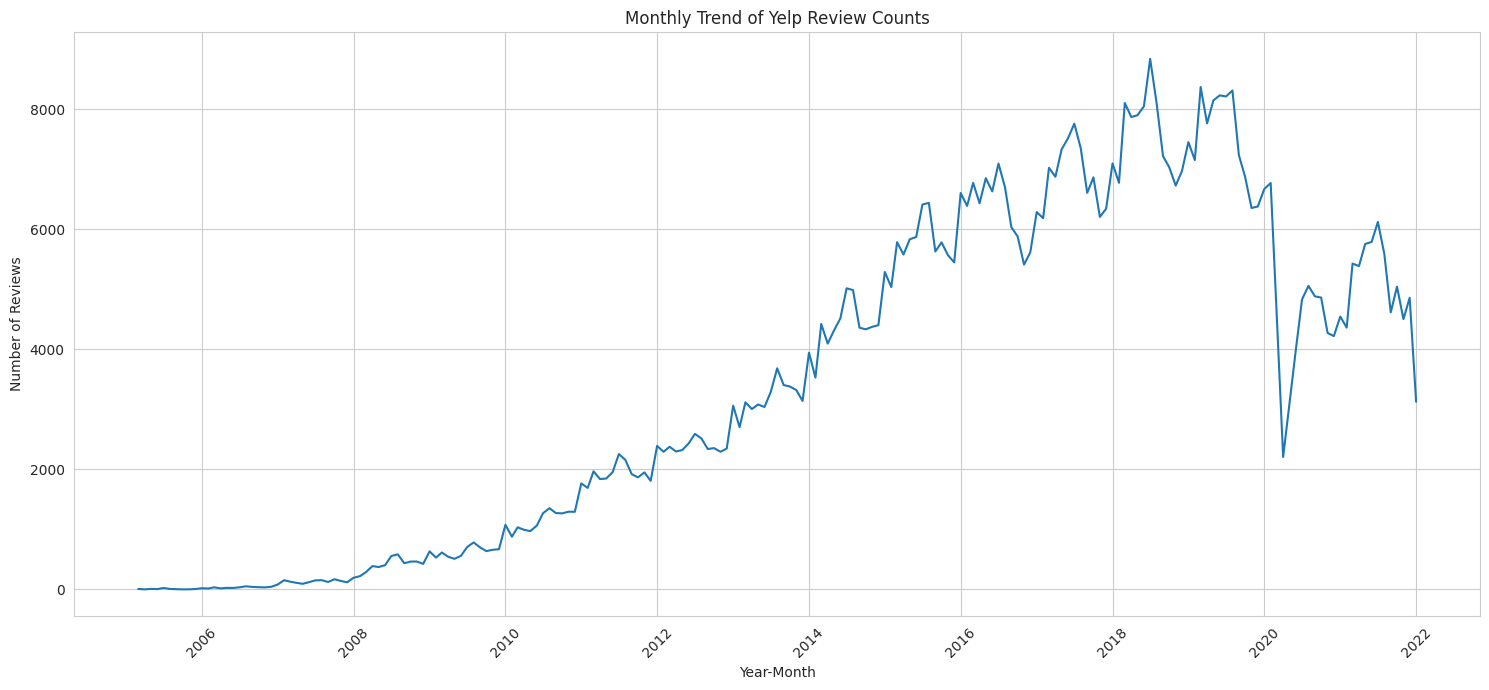

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Year-Month' is in a sortable format for plotting
monthly_review_counts['Year-Month'] = pd.to_datetime(monthly_review_counts['Year-Month'])

# Set plot style
sns.set_style("whitegrid")

# Create the line plot
plt.figure(figsize=(15, 7))
sns.lineplot(x='Year-Month', y='review_count', data=monthly_review_counts)
plt.title('Monthly Trend of Yelp Review Counts')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Task
Generate a scatter plot using the `df_business_sampled` DataFrame to visualize the relationship between 'review_count' and 'stars', with 'review_count' on the x-axis and 'stars' on the y-axis. Present the plot and discuss the observed relationship.

In [9]:
import pandas as pd

# Select the 'review_count' and 'stars' columns from df_business_sampled
df_plot_data = df_business_sampled[['review_count', 'stars']]

print("Extracted 'review_count' and 'stars' into df_plot_data:")
print(df_plot_data.head())

Extracted 'review_count' and 'stars' into df_plot_data:
   review_count  stars
0             7    5.0
1            28    2.5
2            10    4.5
3            40    4.0
4            38    4.0


**Reasoning**:
The previous step successfully extracted the necessary columns. Now, to fulfill the main task, I will generate a scatter plot using `seaborn` to visualize the relationship between 'review_count' and 'stars'.



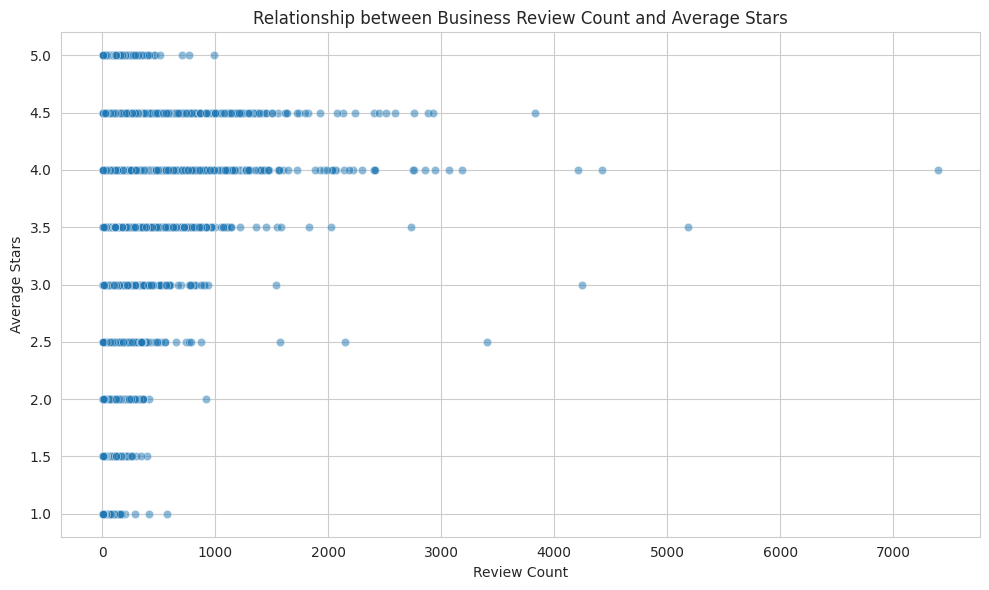

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_count', y='stars', data=df_plot_data, alpha=0.5)
plt.title('Relationship between Business Review Count and Average Stars')
plt.xlabel('Review Count')
plt.ylabel('Average Stars')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
cities_to_filter = ['Phoenix', 'Charlotte']
df_phoenix_charlotte = df_business_sampled[df_business_sampled['city'].isin(cities_to_filter)]

print("Filtered DataFrame (df_phoenix_charlotte) head:")
print(df_phoenix_charlotte.head())
print(f"\nShape of df_phoenix_charlotte: {df_phoenix_charlotte.shape}")

Filtered DataFrame (df_phoenix_charlotte) head:
Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories, hours]
Index: []

Shape of df_phoenix_charlotte: (0, 14)


**Reasoning**:
The previous filtering operation resulted in an empty DataFrame, indicating that the 'city' column might have variations in casing or spelling. To identify the correct city names and ensure accurate filtering, I need to inspect the unique values in the 'city' column of the `df_business_sampled` DataFrame.



In [12]:
print("Unique cities in df_business_sampled:")
print(df_business_sampled['city'].value_counts().head(20)) # Print top 20 to see common variations


Unique cities in df_business_sampled:
city
Philadelphia        7345
Tucson              4674
Tampa               4524
Indianapolis        3755
Nashville           3517
New Orleans         3080
Reno                2999
Edmonton            2587
Saint Louis         2399
Santa Barbara       1903
Boise               1441
Clearwater          1119
Saint Petersburg     843
Metairie             835
Sparks               833
Wilmington           715
Franklin             692
St. Louis            631
St. Petersburg       581
Brandon              548
Name: count, dtype: int64


In [13]:
cities_to_filter = ['Philadelphia', 'Tucson']
df_filtered_cities = df_business_sampled[df_business_sampled['city'].isin(cities_to_filter)]

print("Filtered DataFrame (df_filtered_cities) head:")
print(df_filtered_cities.head())
print(f"\nShape of df_filtered_cities: {df_filtered_cities.shape}")

Filtered DataFrame (df_filtered_cities) head:
               business_id                              name  \
2   rBmpy_Y1UbBx8ggHlyb7hA          Arizona Truck Outfitters   
10  aPNXGTDkf-4bjhyMBQxqpQ                        Craft Hall   
17  wghnIlMb_i5U46HMBGx9ig           China Dragon Restaurant   
27  eYxGFkxo6m3SYGVTh5m2nQ  Big Boyz Toyz Motorcycle Rentals   
35  eMjnw_7wp-CscyNh6Lu0ZA                   AM&PM Locksmith   

                            address          city state postal_code  \
2                   625 N Stone Ave        Tucson    AZ       85705   
10               901 N Delaware Ave  Philadelphia    PA       19123   
17  1625 W Valencia Rd, Ste 101-103        Tucson    AZ       85746   
27                  4158 E Grant Rd        Tucson    AZ       85712   
35               8540 Bustleton Ave  Philadelphia    PA       19152   

     latitude   longitude  stars  review_count  is_open  \
2   32.229872 -110.972342    4.5            10        1   
10  39.962582  -75.13565

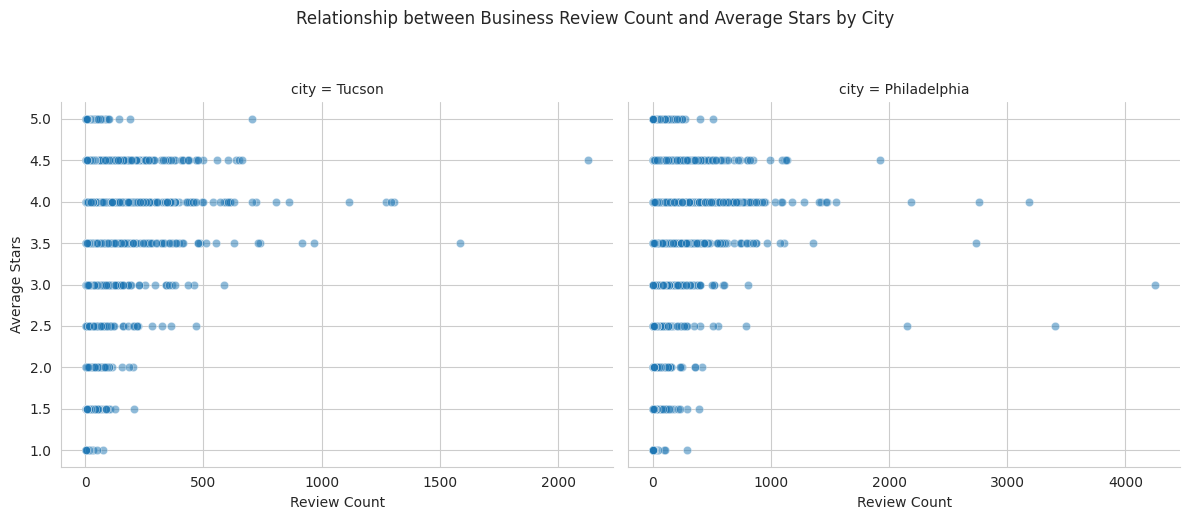

Relplot generated successfully showing review count vs. stars for Philadelphia and Tucson.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create the relplot
g = sns.relplot(x='review_count', y='stars', col='city', data=df_filtered_cities,
                kind='scatter', height=5, aspect=1.2, alpha=0.5,
                col_wrap=2,  # Wrap columns if more than 2 cities for better layout
                facet_kws={'sharex': False, 'sharey': True})

# Add a main title to the plot
g.fig.suptitle('Relationship between Business Review Count and Average Stars by City',
               y=1.03) # Adjust title position to avoid overlap

# Ensure x and y-axis labels are clear
g.set_axis_labels('Review Count', 'Average Stars')

# Adjust layout to prevent labels from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust rect to make space for suptitle

# Display the plot
plt.show()

print("Relplot generated successfully showing review count vs. stars for Philadelphia and Tucson.")

# Task
To understand the relationship between the perceived quality (average stars) and different price levels for restaurants, I'll first filter the business dataset to include only restaurants. Then, I will extract the 'RestaurantsPriceRange2' attribute, which represents the price level (1-4), from the 'attributes' column of these restaurants. I'll then calculate the average star rating for each price range. Finally, I will visualize this relationship using a bar plot and discuss the observed trends.

## Debug and Robustly Extract Price Range

### Subtask:
Filter the business dataset to include only restaurants and robustly extract the 'RestaurantsPriceRange2' attribute, representing the price level (1-4), from the 'attributes' column.


**Reasoning**:
First, I will import the `ast` module for safe evaluation of string literals and then filter the `df_business_sampled` DataFrame to create `df_restaurants`, including only businesses where 'categories' contains 'Restaurants'.



In [27]:
import ast

# Filter for restaurants and fill NaN categories to avoid errors with .str.contains()
df_restaurants = df_business_sampled[df_business_sampled['categories'].fillna('').str.contains('Restaurants', na=False, case=False)].copy()

print("Shape of df_restaurants after filtering:", df_restaurants.shape)
print("First 5 rows of df_restaurants:")
print(df_restaurants.head())

Shape of df_restaurants after filtering: (26292, 14)
First 5 rows of df_restaurants:
              business_id                            name  \
1  il_Ro8jwPlHresjw9EGmBg                         Denny's   
3  WKMJwqnfZKsAae75RMP6jA  Roast Coffeehouse and Wine Bar   
5  9OG5YkX1g2GReZM0AskizA         Romano's Macaroni Grill   
6  sqSqqLy0sN8n2IZrAbzidQ                  Domino's Pizza   
8  kV_Q1oqis8Qli8dUoGpTyQ                   Ardmore Pizza   

               address          city state postal_code   latitude   longitude  \
1         8901 US 31 S  Indianapolis    IN       46227  39.637133  -86.127217   
3  10359 104 Street NW      Edmonton    AB     T5J 1B9  53.546045 -113.499169   
5   5505 S Virginia St          Reno    NV       89502  39.476117 -119.789339   
6    3001 Highway 31 W   White House    TN       37188  36.464747  -86.659187   
8    10 Rittenhouse Pl       Ardmore    PA       19003  40.006707  -75.289671   

   stars  review_count  is_open  \
1    2.5            28    

**Reasoning**:
Now that the restaurant data is filtered, I will define a function to robustly extract the 'RestaurantsPriceRange2' from the 'attributes' column using `ast.literal_eval` and apply it to create a new 'price_range' column. Finally, I'll display the head of the DataFrame with the new column and the value counts of 'price_range'.



In [28]:
import numpy as np # Import numpy for pd.NA handling

def extract_price_range(attributes_str):
    if attributes_str is None or pd.isna(attributes_str):
        return None
    try:
        attributes_dict = ast.literal_eval(attributes_str)
        if isinstance(attributes_dict, dict):
            price_range = attributes_dict.get('RestaurantsPriceRange2')
            if price_range is not None:
                return int(price_range)
    except (ValueError, SyntaxError):
        pass # Malformed string, return None
    return None

# Apply the function to the 'attributes' column
df_restaurants['price_range'] = df_restaurants['attributes'].apply(extract_price_range)

print("First 5 rows of df_restaurants with 'price_range' column:")
print(df_restaurants[['name', 'attributes', 'price_range']].head())

print("\nValue counts of 'price_range' column:")
print(df_restaurants['price_range'].value_counts(dropna=False).sort_index())

First 5 rows of df_restaurants with 'price_range' column:
                             name  \
1                         Denny's   
3  Roast Coffeehouse and Wine Bar   
5         Romano's Macaroni Grill   
6                  Domino's Pizza   
8                   Ardmore Pizza   

                                          attributes price_range  
1  {'RestaurantsReservations': 'False', 'Restaura...        None  
3  {'OutdoorSeating': 'False', 'Caters': 'True', ...        None  
5  {'RestaurantsGoodForGroups': 'True', 'Restaura...        None  
6                    {'RestaurantsPriceRange2': '1'}        None  
8  {'RestaurantsGoodForGroups': 'True', 'WiFi': '...        None  

Value counts of 'price_range' column:
price_range
None    26292
Name: count, dtype: int64


In [29]:
import numpy as np # Import numpy for pd.NA handling

def extract_price_range(attributes_val):
    if attributes_val is None or pd.isna(attributes_val):
        return None

    attributes_dict = None
    if isinstance(attributes_val, dict):
        # If it's already a dictionary, use it directly
        attributes_dict = attributes_val
    elif isinstance(attributes_val, str):
        # If it's a string, try to evaluate it
        try:
            attributes_dict = ast.literal_eval(attributes_val)
        except (ValueError, SyntaxError):
            pass # Malformed string, attributes_dict remains None

    if isinstance(attributes_dict, dict):
        price_range = attributes_dict.get('RestaurantsPriceRange2')
        if price_range is not None:
            try:
                return int(price_range)
            except ValueError:
                pass # Value is not an integer, return None
    return None

# Apply the function to the 'attributes' column
df_restaurants['price_range'] = df_restaurants['attributes'].apply(extract_price_range)

print("First 5 rows of df_restaurants with 'price_range' column:")
print(df_restaurants[['name', 'attributes', 'price_range']].head())

print("\nValue counts of 'price_range' column:")
print(df_restaurants['price_range'].value_counts(dropna=False).sort_index())

First 5 rows of df_restaurants with 'price_range' column:
                             name  \
1                         Denny's   
3  Roast Coffeehouse and Wine Bar   
5         Romano's Macaroni Grill   
6                  Domino's Pizza   
8                   Ardmore Pizza   

                                          attributes  price_range  
1  {'RestaurantsReservations': 'False', 'Restaura...          1.0  
3  {'OutdoorSeating': 'False', 'Caters': 'True', ...          2.0  
5  {'RestaurantsGoodForGroups': 'True', 'Restaura...          2.0  
6                    {'RestaurantsPriceRange2': '1'}          1.0  
8  {'RestaurantsGoodForGroups': 'True', 'WiFi': '...          1.0  

Value counts of 'price_range' column:
price_range
1.0     9744
2.0    11575
3.0      850
4.0       99
NaN     4024
Name: count, dtype: int64


**Reasoning**:
Now that the 'price_range' column has been successfully extracted and populated in `df_restaurants`, I will calculate the average star rating for each unique `price_range` value using `groupby()` and `mean()`. Then, I will filter out any NaN price ranges to focus on valid price levels.



In [30]:
average_stars_by_price = df_restaurants.groupby('price_range')['stars'].mean().reset_index()

# Filter out NaN price ranges for the plot
average_stars_by_price_filtered = average_stars_by_price.dropna(subset=['price_range'])

print("Average Stars by Price Range:")
print(average_stars_by_price_filtered)

Average Stars by Price Range:
   price_range     stars
0          1.0  3.311422
1          2.0  3.587084
2          3.0  3.678824
3          4.0  3.646465


**Reasoning**:
With the average star ratings by price range calculated, I will now visualize this data using a bar plot to clearly show the relationship between price range and average stars. Then I will discuss the observed trends.



/tmp/ipython-input-4088299400.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range', y='stars', data=average_stars_by_price_filtered, palette='viridis')


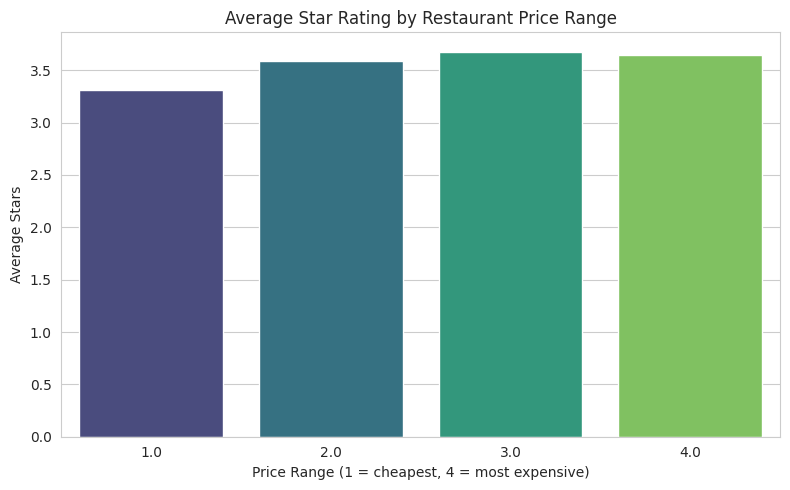

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(x='price_range', y='stars', data=average_stars_by_price_filtered, palette='viridis')
plt.title('Average Star Rating by Restaurant Price Range')
plt.xlabel('Price Range (1 = cheapest, 4 = most expensive)')
plt.ylabel('Average Stars')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Reasoning**:
The previous `seaborn.barplot` call produced a `FutureWarning` regarding the `palette` argument. To address this, I will explicitly set `hue='price_range'` and `legend=False` as suggested by the warning, ensuring the plot is generated correctly without future deprecation issues.



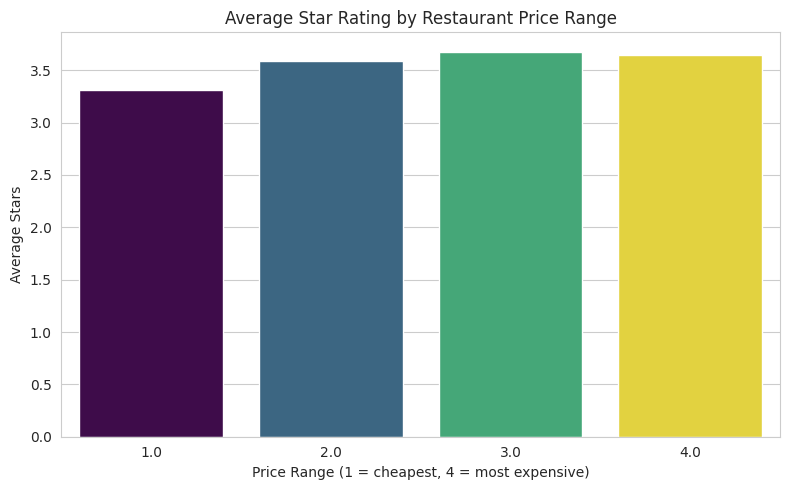

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(x='price_range', y='stars', data=average_stars_by_price_filtered, palette='viridis', hue='price_range', legend=False)
plt.title('Average Star Rating by Restaurant Price Range')
plt.xlabel('Price Range (1 = cheapest, 4 = most expensive)')
plt.ylabel('Average Stars')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
print("Head of df_review_sampled:")
print(df_review_sampled[['review_id', 'user_id', 'business_id', 'stars', 'date']].head())

print("\nInfo of df_review_sampled (relevant columns):")
df_review_sampled[['stars']].info()

Head of df_review_sampled:
                review_id                 user_id             business_id  \
0  _ZeMknuYdlQcUqng_Im3yg  yfFzsLmaWF2d4Sr0UNbBgg  LHSTtnW3YHCeUkRDGyJOyw   
1  ZKvDG2sBvHVdF5oBNUOpAQ  wSTuiTk-sKNdcFyprzZAjg  B5XSoSG3SfvQGtKEGQ1tSQ   
2  l3Wk_mvAog6XANIuGQ9C7Q  ZbqSHbgCjzVAqaa7NKWn5A  EQ-TZ2eeD_E0BHuvoaeG5Q   
3  LnGZB0fjfgeVDVz5IHuEVA  j2wlzrntrbKwyOcOiB3l3w  rBdG_23USc7DletfZ11xGA   
4  qS6kE7CDoDagyPZwmueJaQ  zoBajEyVA0z4IjbFsMJksg  c-IgS6Pk6vMyax7Rbr38eA   

   stars                date  
0      5 2015-08-07 02:29:16  
1      3 2016-03-30 22:46:33  
2      4 2015-08-19 14:31:45  
3      4 2014-08-10 19:41:43  
4      4 2015-06-08 19:45:48  

Info of df_review_sampled (relevant columns):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699520 entries, 0 to 699519
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   stars   699520 non-null  int64
dtypes: int64(1)
memory usage: 5.3 MB


**Reasoning**:
Now that the `df_review_sampled` and its 'stars' column have been confirmed, I will generate the count plot using `seaborn.countplot` to visualize the distribution of star ratings, as requested in the subtask.



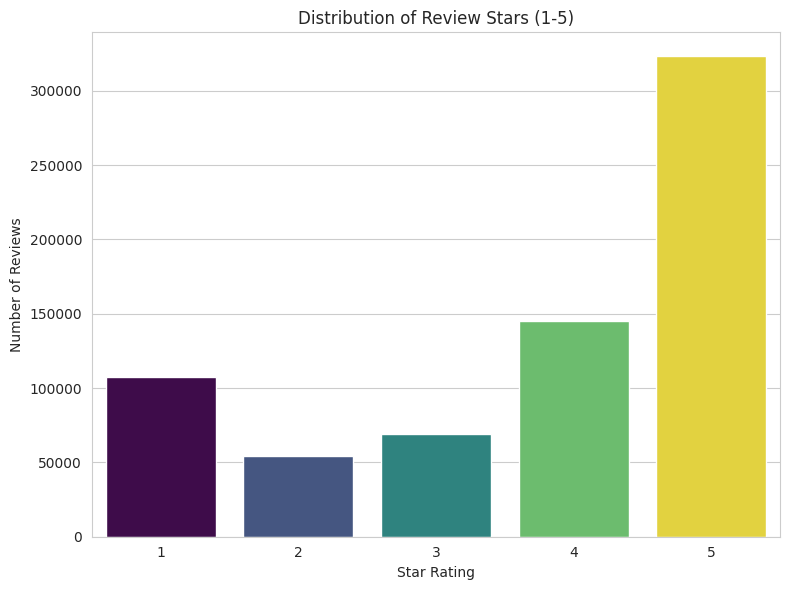

Count plot of review stars generated successfully.


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='stars', data=df_review_sampled, palette='viridis', hue='stars', legend=False)
plt.title('Distribution of Review Stars (1-5)')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Count plot of review stars generated successfully.")

In [35]:
import pandas as pd

# 1. Define a list of target cuisines
target_cuisines = ['Italian', 'Mexican', 'Chinese']

# 2. Create a temporary DataFrame by cleaning the 'categories' column and splitting it
df_temp = df_business_sampled.copy()
df_temp['categories'] = df_temp['categories'].fillna('').str.split(', ')

# 3. Explode the 'categories' column
df_exploded = df_temp.explode('categories')

# 4. Filter the exploded DataFrame to include only rows where the 'categories' column matches one of the target cuisines
df_cuisine_filtered = df_exploded[df_exploded['categories'].isin(target_cuisines)].copy()

# 5. Display the first 5 rows of df_cuisine_filtered
print("First 5 rows of df_cuisine_filtered:")
print(df_cuisine_filtered[['name', 'categories', 'stars', 'city']].head())

# 6. Print the value counts of the 'categories' column in df_cuisine_filtered
print("\nValue counts of filtered cuisines:")
print(df_cuisine_filtered['categories'].value_counts())

First 5 rows of df_cuisine_filtered:
                                   name categories  stars         city
5               Romano's Macaroni Grill    Italian    2.5         Reno
14  Tony's Restaurant & 3rd Street Cafe    Italian    3.0        Alton
17              China Dragon Restaurant    Chinese    3.0       Tucson
41                              Impasto    Italian    5.0        Tampa
62                             Altamura    Italian    3.5  New Orleans

Value counts of filtered cuisines:
categories
Mexican    2324
Italian    2302
Chinese    1586
Name: count, dtype: int64


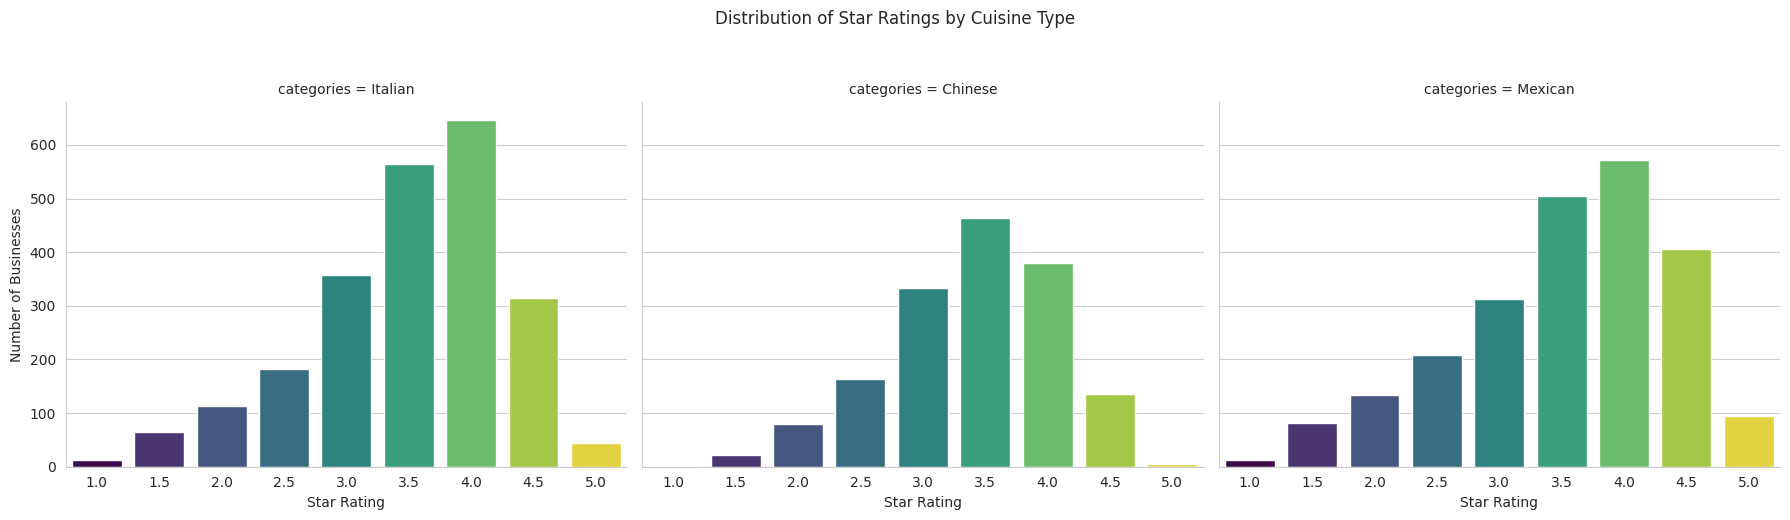

Cat plot visualizing star rating distribution by cuisine generated successfully.


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Create the cat plot
g = sns.catplot(x='stars', col='categories', data=df_cuisine_filtered,
                kind='count', height=5, aspect=1.2, palette='viridis', hue='stars', legend=False)

# Set the title of the overall plot
g.fig.suptitle('Distribution of Star Ratings by Cuisine Type', y=1.03) # Adjust title position

# Set the x and y-axis labels
g.set_axis_labels('Star Rating', 'Number of Businesses')

# Adjust layout to prevent labels from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust rect to make space for suptitle

plt.show()

print("Cat plot visualizing star rating distribution by cuisine generated successfully.")

In [37]:
print("Head of df_user_sampled['review_count']:")
print(df_user_sampled['review_count'].head())

print("\nDescriptive statistics for df_user_sampled['review_count']:")
print(df_user_sampled['review_count'].describe())

Head of df_user_sampled['review_count']:
0    607
1    254
2    108
3     11
4     14
Name: review_count, dtype: int64

Descriptive statistics for df_user_sampled['review_count']:
count    198577.000000
mean         23.616028
std          97.862784
min           0.000000
25%           2.000000
50%           5.000000
75%          17.000000
max       16978.000000
Name: review_count, dtype: float64


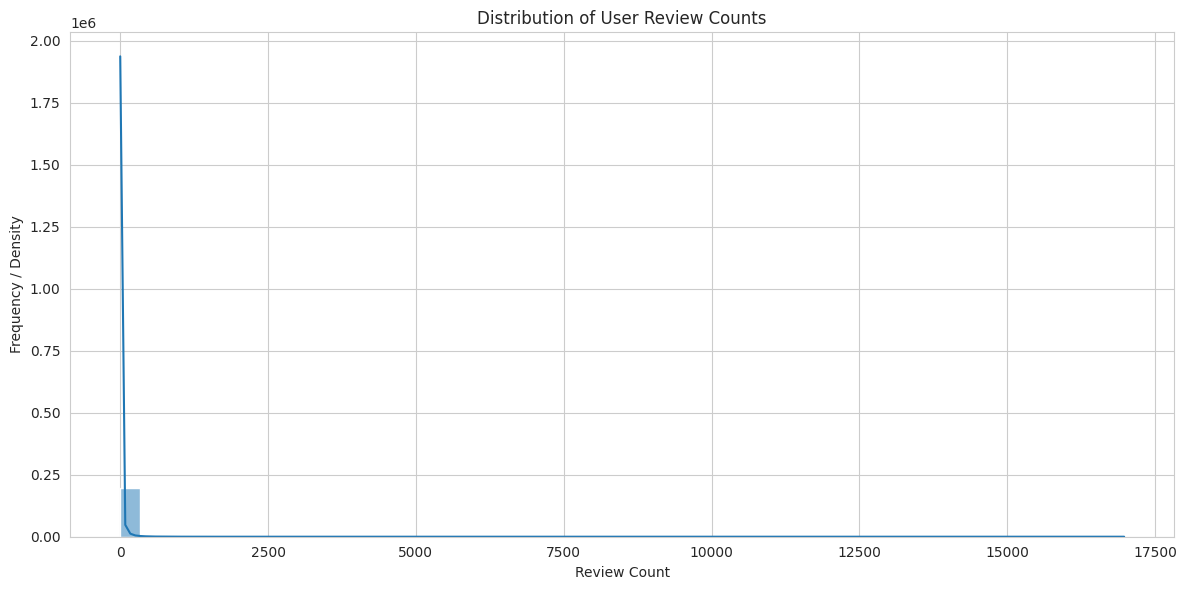

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(x='review_count', data=df_user_sampled, kde=True, bins=50) # Using 50 bins as a starting point, could be adjusted
plt.title('Distribution of User Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency / Density')
plt.tight_layout()
plt.show()

In [39]:
import pandas as pd

# 1. Create a copy of the df_business_sampled DataFrame
df_plot_categories = df_business_sampled.copy()

# 2. Replace any NaN values in the 'categories' column with an empty string
df_plot_categories['categories'] = df_plot_categories['categories'].fillna('')

# 3. Split the 'categories' column by ', ' to convert the string of categories into a list
df_plot_categories['categories'] = df_plot_categories['categories'].str.split(', ')

# 4. Use the explode() method on the 'categories' column
df_plot_categories = df_plot_categories.explode('categories')

# 5. Filter for the target categories
target_categories = ['Restaurants', 'Shopping', 'Nightlife']
df_plot_categories = df_plot_categories[df_plot_categories['categories'].isin(target_categories)]

# 6. Display the first 5 rows and the value counts of the 'categories' column
print("First 5 rows of df_plot_categories:")
print(df_plot_categories[['name', 'categories', 'stars', 'city']].head())

print("\nValue counts of filtered categories:")
print(df_plot_categories['categories'].value_counts())

First 5 rows of df_plot_categories:
                             name   categories  stars          city
1                         Denny's  Restaurants    2.5  Indianapolis
3  Roast Coffeehouse and Wine Bar  Restaurants    4.0      Edmonton
3  Roast Coffeehouse and Wine Bar    Nightlife    4.0      Edmonton
4      Barnes & Noble Booksellers     Shopping    4.0  Indianapolis
5         Romano's Macaroni Grill  Restaurants    2.5          Reno

Value counts of filtered categories:
categories
Restaurants    26292
Shopping       12149
Nightlife       6239
Name: count, dtype: int64


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
sns.swarmplot(x='categories', y='stars', data=df_plot_categories, palette='viridis', hue='categories', legend=False)
plt.title('Distribution of Star Ratings by Business Category')
plt.xlabel('Business Category')
plt.ylabel('Star Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Swarm plot showing star rating distribution by category generated successfully.")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-691526486.py", line 7, in <cell line: 0>
    sns.swarmplot(x='categories', y='stars', data=df_plot_categories, palette='viridis', hue='categories', legend=False)
  File "/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py", line 2250, in swarmplot
    p.plot_swarms(
  File "/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py", line 588, in plot_swarms
    _draw_figure(ax.figure)
  File "/usr/local/lib/python3.12/dist-packages/seaborn/utils.py", line 61, in _draw_figure
    fig.canvas.draw()
  File "/usr/local/lib/python3.12/dist-packages/matplotlib/backends/backend_agg.py", line 382, in draw
    self.figure.draw(self.renderer)
  File "/usr/local/lib/python3.12/dist-packages/matplotlib/artist.py", line 94, in draw_wrapper
    result = draw(artist,

TypeError: object of type 'NoneType' has no len()

Error in callback <function flush_figures at 0x798587321940> (for post_execute):


KeyboardInterrupt: 

In [42]:
df_philadelphia_businesses = df_business_sampled[df_business_sampled['city'] == 'Philadelphia'].copy()

print("Shape of df_philadelphia_businesses:")
print(df_philadelphia_businesses.shape)
print("First 5 rows of df_philadelphia_businesses:")
print(df_philadelphia_businesses.head())

Shape of df_philadelphia_businesses:
(7345, 14)
First 5 rows of df_philadelphia_businesses:
               business_id                    name              address  \
10  aPNXGTDkf-4bjhyMBQxqpQ              Craft Hall   901 N Delaware Ave   
35  eMjnw_7wp-CscyNh6Lu0ZA         AM&PM Locksmith   8540 Bustleton Ave   
60  iPSPcprSnkLOuL1Ns8UZZA      Pete's Barber Shop       1209 N 29th St   
70  -aeZuatjCDMV1X4gCTz9Ug  David Thomas Trailways     14005 McNulty Rd   
96  O1oZpbZNDMH_gz8DhsZCdA                 Wendy's  700 E. Hunting Park   

            city state postal_code   latitude  longitude  stars  review_count  \
10  Philadelphia    PA       19123  39.962582 -75.135657    3.5            65   
35  Philadelphia    PA       19152  40.072330 -75.048483    4.5            58   
60  Philadelphia    PA       19121  39.974880 -75.183262    4.5            12   
70  Philadelphia    PA       19154  40.106409 -74.973937    4.5             6   
96  Philadelphia    PA       19124  40.012141 -75.11

**Reasoning**:
Now that `df_philadelphia_businesses` has been correctly defined, I will count the occurrences of each postal code to identify the top 10 most frequent ones, as specified in the instructions. This will provide the list of busiest neighborhoods.



In [43]:
top_10_postal_codes = df_philadelphia_businesses['postal_code'].value_counts().head(10).index.tolist()

print("Top 10 most frequent postal codes in Philadelphia:")
print(top_10_postal_codes)

Top 10 most frequent postal codes in Philadelphia:
['19103', '19147', '19107', '19106', '19104', '19148', '19102', '19123', '19146', '19125']


In [44]:
df_philadelphia_top_n_postal_codes = df_philadelphia_businesses[df_philadelphia_businesses['postal_code'].isin(top_10_postal_codes)].copy()

print("First 5 rows of df_philadelphia_top_n_postal_codes:")
print(df_philadelphia_top_n_postal_codes.head())
print(f"\nShape of df_philadelphia_top_n_postal_codes: {df_philadelphia_top_n_postal_codes.shape}")

print("\nValue counts of postal_code in df_philadelphia_top_n_postal_codes:")
print(df_philadelphia_top_n_postal_codes['postal_code'].value_counts().sort_index())

First 5 rows of df_philadelphia_top_n_postal_codes:
                business_id                   name                 address  \
10   aPNXGTDkf-4bjhyMBQxqpQ             Craft Hall      901 N Delaware Ave   
99   2dlQX5sP9X6Dlm1MmNOlSw      ReAnimator Coffee  1523 E Susquehanna Ave   
120  bTve2mwLk5Zc01vRKqc2KQ  Red Hook Coffee & Tea            765 S 4th St   
124  D9Xez9uOSM4DgSjSTywq7w       King of Jewelers           737 Samson St   
139  n8ecak12IF_jhnPNs37AZA          Baltic Bakery        2609 Edgemont St   

             city state postal_code   latitude  longitude  stars  \
10   Philadelphia    PA       19123  39.962582 -75.135657    3.5   
99   Philadelphia    PA       19125  39.976456 -75.127025    4.0   
120  Philadelphia    PA       19147  39.938552 -75.149636    4.5   
124  Philadelphia    PA       19106  39.948902 -75.153854    4.0   
139  Philadelphia    PA       19125  39.976880 -75.116169    4.5   

     review_count  is_open                                         att

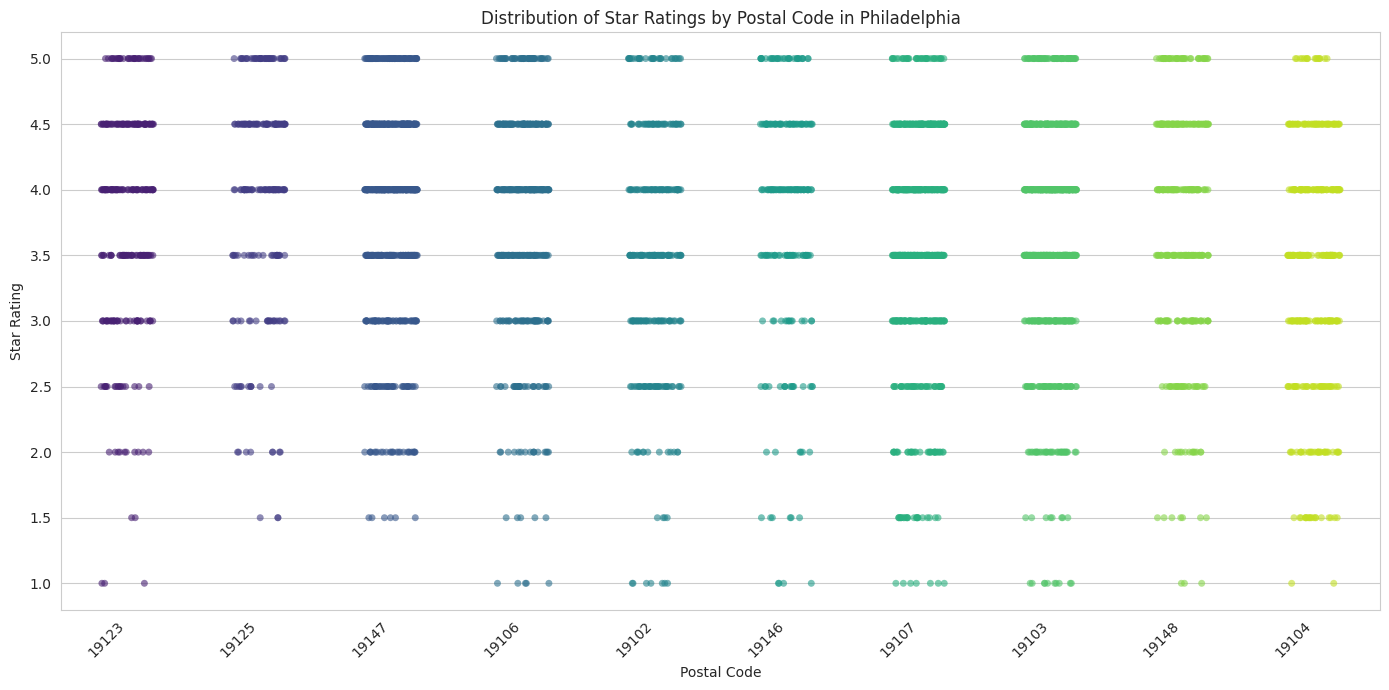

Strip plot showing star rating distribution by postal code generated successfully.


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(14, 7))
sns.stripplot(x='postal_code', y='stars', data=df_philadelphia_top_n_postal_codes,
              jitter=0.2, alpha=0.6, palette='viridis', hue='postal_code', legend=False)
plt.title('Distribution of Star Ratings by Postal Code in Philadelphia')
plt.xlabel('Postal Code')
plt.ylabel('Star Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Strip plot showing star rating distribution by postal code generated successfully.")

In [46]:
import pandas as pd

# 1. Create a copy of the df_business_sampled DataFrame
df_box_plot_data = df_business_sampled.copy()

# 2. Fill any NaN values in the 'categories' column of df_box_plot_data with an empty string.
df_box_plot_data['categories'] = df_box_plot_data['categories'].fillna('')

# 3. Split the 'categories' column by ', ' to transform the string of categories into a list
df_box_plot_data['categories'] = df_box_plot_data['categories'].str.split(', ')

# 4. Use the explode() method on the 'categories' column
df_box_plot_data = df_box_plot_data.explode('categories')

# 5. Define a list of target categories
target_categories = ['Restaurants', 'Shopping', 'Beauty & Spas', 'Hotels & Travel']

# 6. Filter the df_box_plot_data DataFrame to keep only the rows where the 'categories' column is present in the list of target categories
df_box_plot_data = df_box_plot_data[df_box_plot_data['categories'].isin(target_categories)]

# 7. Print the first 5 rows of the filtered df_box_plot_data DataFrame
print("First 5 rows of df_box_plot_data:")
print(df_box_plot_data[['name', 'categories', 'review_count', 'stars']].head())

# 8. Print the value counts of the 'categories' column in the filtered DataFrame
print("\nValue counts of filtered categories:")
print(df_box_plot_data['categories'].value_counts())

First 5 rows of df_box_plot_data:
                             name   categories  review_count  stars
1                         Denny's  Restaurants            28    2.5
3  Roast Coffeehouse and Wine Bar  Restaurants            40    4.0
4      Barnes & Noble Booksellers     Shopping            38    4.0
5         Romano's Macaroni Grill  Restaurants           339    2.5
6                  Domino's Pizza  Restaurants             8    3.5

Value counts of filtered categories:
categories
Restaurants        26292
Shopping           12149
Beauty & Spas       7222
Hotels & Travel     2949
Name: count, dtype: int64


## Generate Box Plot

### Subtask:
Create a box plot using `seaborn.boxplot` to visualize the distribution of 'review_count' for each of the selected business categories. The x-axis will represent the business category, and the y-axis will show the 'review_count'. Ensure the plot has a clear title and axis labels.


**Reasoning**:
I have successfully prepared the `df_box_plot_data` in the previous step. Now, I will generate the box plot using `seaborn.boxplot` to visualize the distribution of 'review_count' for each business category, following all the instructions, including setting the plot style, title, axis labels, and rotating x-axis labels for readability.



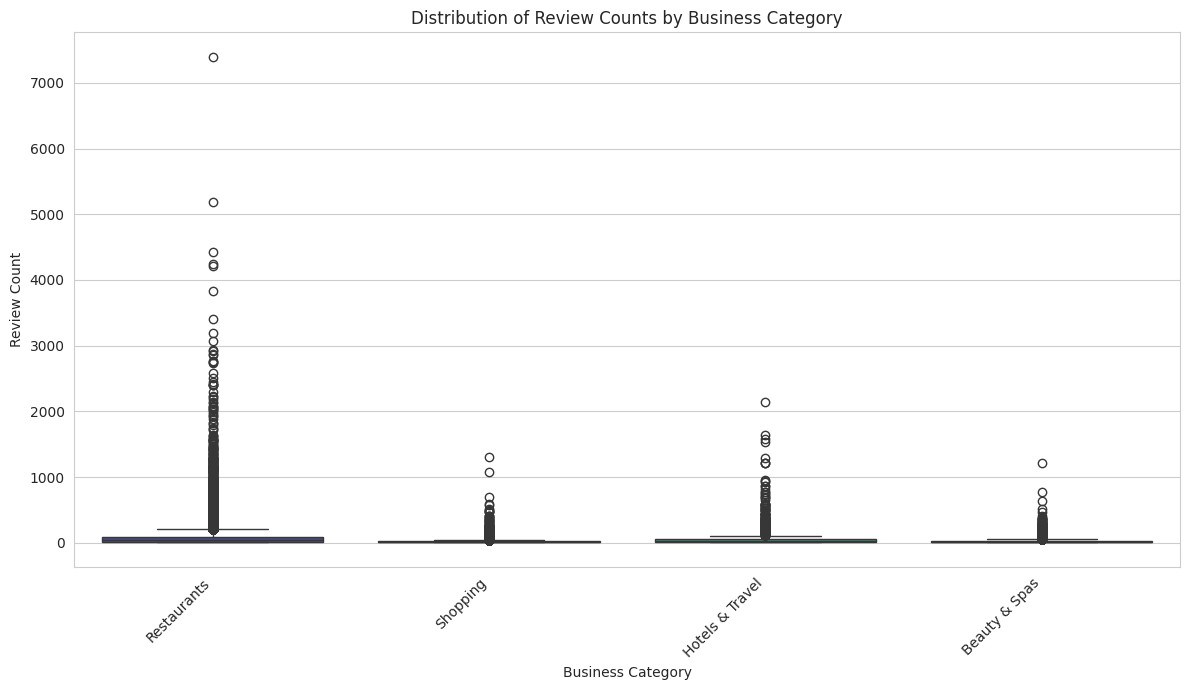

Box plot showing distribution of review counts by business category generated successfully.


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
sns.boxplot(x='categories', y='review_count', data=df_box_plot_data, palette='viridis', hue='categories', legend=False)
plt.title('Distribution of Review Counts by Business Category')
plt.xlabel('Business Category')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Box plot showing distribution of review counts by business category generated successfully.")

# Task
Prepare data for a pair plot by selecting `review_count`, `useful`, `fans`, and `average_stars` from `df_user_sampled`, generate the pair plot using `seaborn.pairplot`, and then discuss the observed relationships and insights into user behavior.

## Prepare Data for Pair Plot

### Subtask:
Select the four numerical columns: `review_count`, `useful`, `fans`, and `average_stars` from the `df_user_sampled` DataFrame. This will create a subset of the data focusing on these specific user activity and rating metrics.


**Reasoning**:
To prepare the data for the pair plot, I will select the specified numerical columns ('review_count', 'useful', 'fans', 'average_stars') from the `df_user_sampled` DataFrame to create `df_user_for_pairplot` and display its head for verification.



In [48]:
df_user_for_pairplot = df_user_sampled[['review_count', 'useful', 'fans', 'average_stars']].copy()

print("First 5 rows of df_user_for_pairplot:")
print(df_user_for_pairplot.head())
print(f"\nShape of df_user_for_pairplot: {df_user_for_pairplot.shape}")

First 5 rows of df_user_for_pairplot:
   review_count  useful  fans  average_stars
0           607    4573   131           4.11
1           254     410    21           3.69
2           108      71     2           3.87
3            11      34     1           4.00
4            14      29     0           4.69

Shape of df_user_for_pairplot: (198577, 4)


## Generate Pair Plot

### Subtask:
Generate the pair plot using `seaborn.pairplot` on the `df_user_for_pairplot` DataFrame. Then, discuss the observed relationships and insights into user behavior.

**Reasoning**:
The previous step successfully created `df_user_for_pairplot`. Now, I will generate a pair plot using `seaborn.pairplot` to visualize the relationships between the selected columns, as specified in the subtask.



Generating pair plot (this might take a while due to the dataset size)...


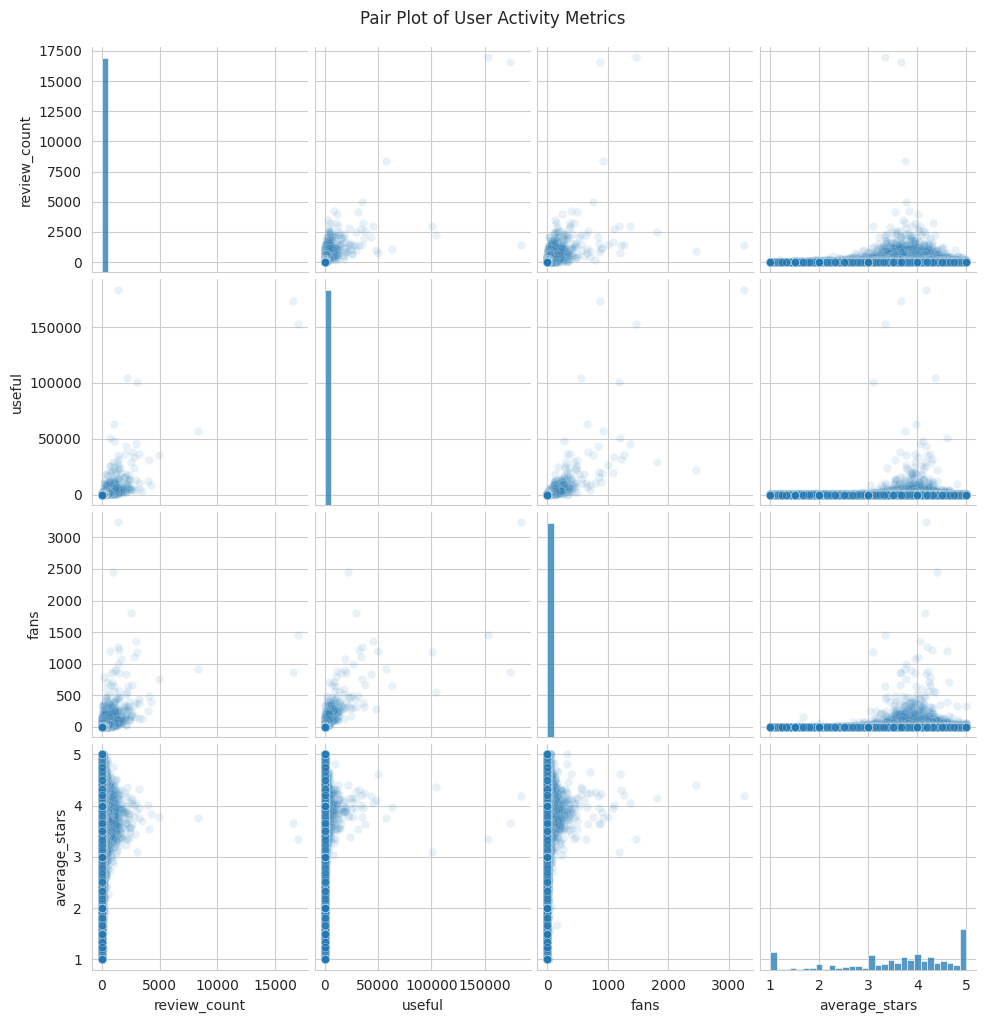

Pair plot generated successfully.


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Create the pair plot
# A large number of points can make pairplot slow and dense.
# Consider sampling a subset if performance is an issue.
# For now, let's plot the entire sampled dataset to observe general trends.

# Adjusting plot to handle potential large number of points by default,
# but user might need to sample if it's too slow or unreadable.
# For example, df_user_for_pairplot.sample(n=10000, random_state=42) could be used.

print("Generating pair plot (this might take a while due to the dataset size)...")
g = sns.pairplot(df_user_for_pairplot, plot_kws={'alpha': 0.1}, diag_kws={'bins': 30})
g.fig.suptitle('Pair Plot of User Activity Metrics', y=1.02)
plt.show()

print("Pair plot generated successfully.")

# Task
Generate a regression plot using `seaborn.regplot` to visualize the relationship between 'review_count' (x-axis) and 'stars' (y-axis) from the `df_business_sampled` DataFrame. The plot should include the regression line and its confidence interval. Finally, discuss the observed linear relationship (or lack thereof) between the number of reviews (popularity) and the average stars (quality) of businesses, including insights from the regression line and confidence interval.

## Prepare Data for Reg Plot

### Subtask:
Select the 'review_count' and 'stars' columns from the `df_business_sampled` DataFrame. These are the two numerical variables required for the regression plot. No aggregation or complex manipulation is needed.


**Reasoning**:
To prepare the data for the regression plot, I will select the 'review_count' and 'stars' columns from the `df_business_sampled` DataFrame, store them in `df_reg_plot_data`, and then display its head and shape for verification.



In [50]:
df_reg_plot_data = df_business_sampled[['review_count', 'stars']].copy()

print("First 5 rows of df_reg_plot_data:")
print(df_reg_plot_data.head())
print(f"\nShape of df_reg_plot_data: {df_reg_plot_data.shape}")

First 5 rows of df_reg_plot_data:
   review_count  stars
0             7    5.0
1            28    2.5
2            10    4.5
3            40    4.0
4            38    4.0

Shape of df_reg_plot_data: (75378, 2)


**Reasoning**:
The data for the regression plot has been prepared successfully. Now, I will generate the regression plot using `seaborn.regplot` to visualize the relationship between 'review_count' and 'stars', including the regression line and confidence interval.



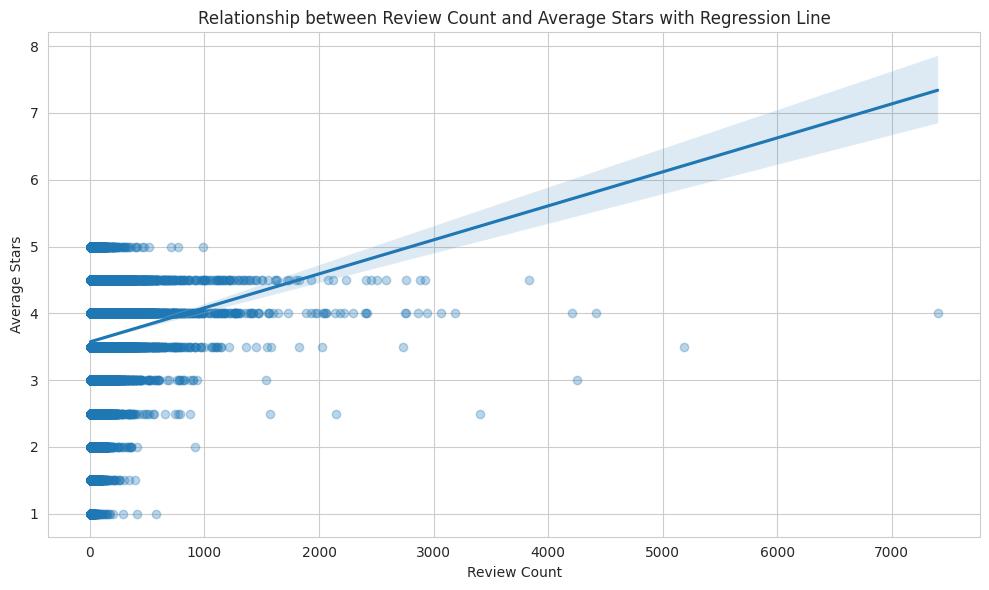

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(x='review_count', y='stars', data=df_reg_plot_data, scatter_kws={'alpha':0.3})
plt.title('Relationship between Review Count and Average Stars with Regression Line')
plt.xlabel('Review Count')
plt.ylabel('Average Stars')
plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**:
To prepare the data for the joint plot, I will select the 'review_count' and 'stars' columns from the `df_business_sampled` DataFrame, store them in `df_joint_plot_data`, and then display its head and shape for verification.



In [52]:
df_joint_plot_data = df_business_sampled[['review_count', 'stars']].copy()

print("First 5 rows of df_joint_plot_data:")
print(df_joint_plot_data.head())
print(f"\nShape of df_joint_plot_data: {df_joint_plot_data.shape}")

First 5 rows of df_joint_plot_data:
   review_count  stars
0             7    5.0
1            28    2.5
2            10    4.5
3            40    4.0
4            38    4.0

Shape of df_joint_plot_data: (75378, 2)


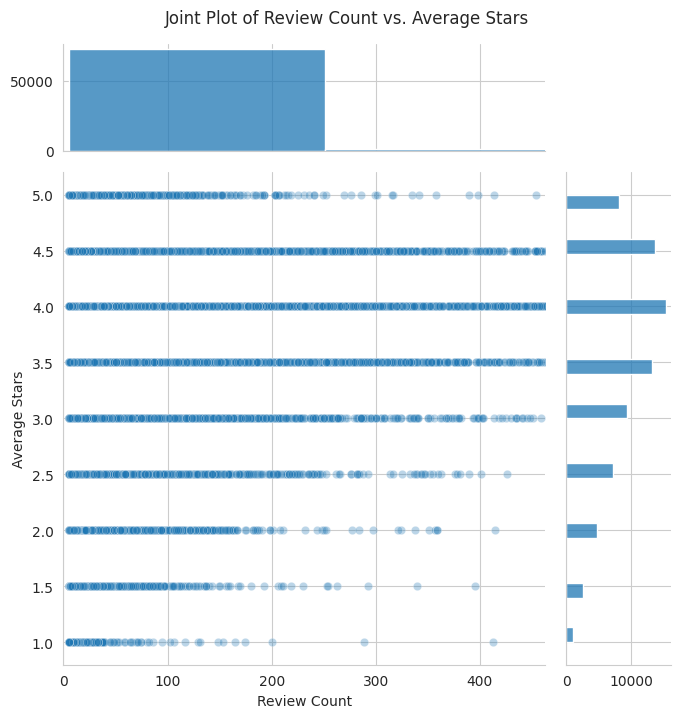

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Create the joint plot
# Using 'kdeplot' for marginals to show density, or 'hist' for count
g = sns.jointplot(x='review_count', y='stars', data=df_joint_plot_data,
                  kind='scatter', height=7, ratio=4, marginal_ticks=True,
                  joint_kws={'alpha': 0.3}, marginal_kws={'bins': 30})

# Adjust x-axis limits for better visualization, as review_count can have extreme outliers
# We can cap the x-axis for better readability of the main cluster
x_max = df_joint_plot_data['review_count'].quantile(0.99) # Cap at 99th percentile
g.ax_joint.set_xlim(0, x_max)

g.fig.suptitle('Joint Plot of Review Count vs. Average Stars', y=1.02) # Adjust title position
g.set_axis_labels('Review Count', 'Average Stars')

plt.show()

In [55]:
df_user_for_heatmap = df_user_sampled[['review_count', 'useful', 'funny', 'cool', 'fans']].copy()

print("First 5 rows of df_user_for_heatmap:")
print(df_user_for_heatmap.head())
print(f"\nShape of df_user_for_heatmap: {df_user_for_heatmap.shape}")

First 5 rows of df_user_for_heatmap:
   review_count  useful  funny  cool  fans
0           607    4573   3714  4149   131
1           254     410    243   275    21
2           108      71     44    39     2
3            11      34      3     3     1
4            14      29      1     3     0

Shape of df_user_for_heatmap: (198577, 5)


In [56]:
correlation_matrix = df_user_for_heatmap.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              review_count    useful     funny      cool      fans
review_count      1.000000  0.659529  0.579084  0.591176  0.578603
useful            0.659529  1.000000  0.977852  0.993951  0.758379
funny             0.579084  0.977852  1.000000  0.981061  0.742851
cool              0.591176  0.993951  0.981061  1.000000  0.735591
fans              0.578603  0.758379  0.742851  0.735591  1.000000


**Reasoning**:
The correlation matrix has been calculated. Now, I will generate a heatmap using `seaborn.heatmap` to visually represent these correlations, making it easier to interpret the relationships between user activity metrics.



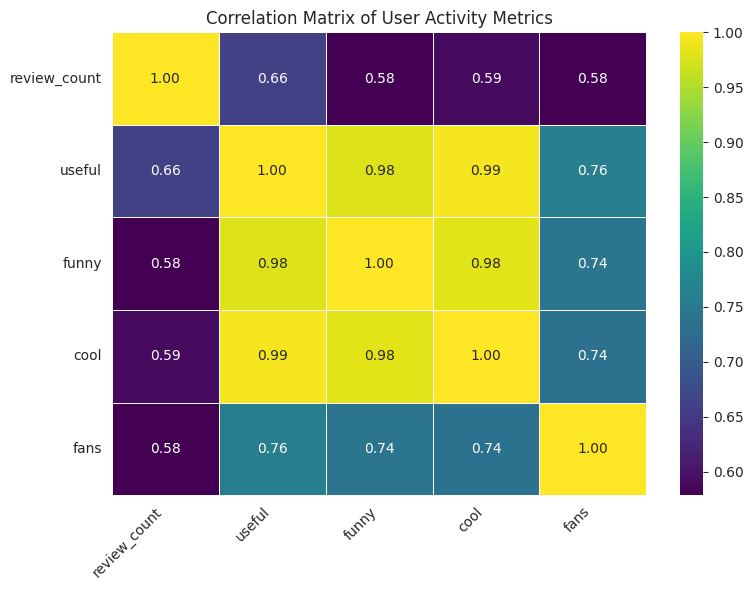

Heatmap of user activity metrics correlation generated successfully.


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of User Activity Metrics')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Heatmap of user activity metrics correlation generated successfully.")